# * Insurance Cost Prediction Using Linear Regression Model *


### Research Question: Insruance cost predciton, which factor influnces the insurance cost the most?
#### Data retrieved from: https://www.kaggle.com/mirichoi0218/insurance


### Overview

The dataset contains information for 1338 individuals with details about their age, sex, BMI, number of children, if they smoke or not, the region they live in, and the cost of medical insurance. The first six factors are the input for our research, and the charge is the output. The main goal of the study is predicting insruance cost using linear regression model, along with finding the factor that influnces the insurance cost the most. The three big steps for this project will be 1.Data cleaning 2.Finding Correlation and Visualization, and 3. Using Linear Regression Model.

### 1. Importing Packages 

In [446]:
import pandas as pd 
import seaborn as sns
import scipy.stats as stats
import numpy as np
import warnings
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### 2. Reading CSV file from dataset to the dataframe

In order to use the data cvs found, we will have to read it in pandas to use it for our work. Below shows our dataframe.

In [414]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Here are some basic information about our data. Below shows the number of columns/obervations (1338), feature names and number of rows (7), and the type for each.  

In [415]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB
None


Since our 'target' is insuarnce cost, below shows basic information about the charges.

In [416]:
df.columns.to_list()
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

### 3. Data Cleaning

#### 3.1 Checking null values
As a first step of data cleaning, we will see if our data has any missing value. 

In [417]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

 All the results came out false. This means that there are no null values/missing data in the dataset. 

#### 3.2 Dropping Columns

Since the columns 'sex' and 'region' is a defult factor (Will not have much impact on the cost, since it isn't something you can change. You can change region, but it will still be within the 4 options), we will be dropping the two columns. 

In [418]:
df.drop(['sex', 'region'], axis=1, inplace=True) 

The data frame below shows the new df with 'sex' and 'region' removed.

In [419]:
df

,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520
5,31,25.740,0,no,3756.62160
6,46,33.440,1,no,8240.58960
7,37,27.740,3,no,7281.50560
8,37,29.830,2,no,6406.41070
9,60,25.840,0,no,28923.13692


#### 3.3 Creating dummy variables for the object type columns

In order to use the smoker feature in our algorithm, we will change it from 'categorical variables' to 'dummy variables'.

In [420]:
pd.get_dummies(df.smoker)

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [421]:
pd.get_dummies(df.smoker, prefix='smoker').iloc[:, 1:]
pd.get_dummies(df.smoker, prefix='smoker').loc[:, 'smoker':]

,smoker_no,smoker_yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


Below shows our new dataframe with the smoker section changed to quantitative data. The name of the feature is smoker_yes, and 1 shows that the person is a smoker and 0 shows that the person is not a smoker. 

In [422]:
df_final = pd.get_dummies(df, columns=['smoker'], drop_first=True)
df_final

,age,bmi,children,charges,smoker_yes
0,19,27.900,0,16884.92400,1
1,18,33.770,1,1725.55230,0
2,28,33.000,3,4449.46200,0
3,33,22.705,0,21984.47061,0
4,32,28.880,0,3866.85520,0
5,31,25.740,0,3756.62160,0
6,46,33.440,1,8240.58960,0
7,37,27.740,3,7281.50560,0
8,37,29.830,2,6406.41070,0
9,60,25.840,0,28923.13692,0


#### 3.4 Checking outliers

We are going to see if there are any ouliers in our data. The feature 'smoker' was not included because it is either 0 or 1. There will not be outliers for it. 

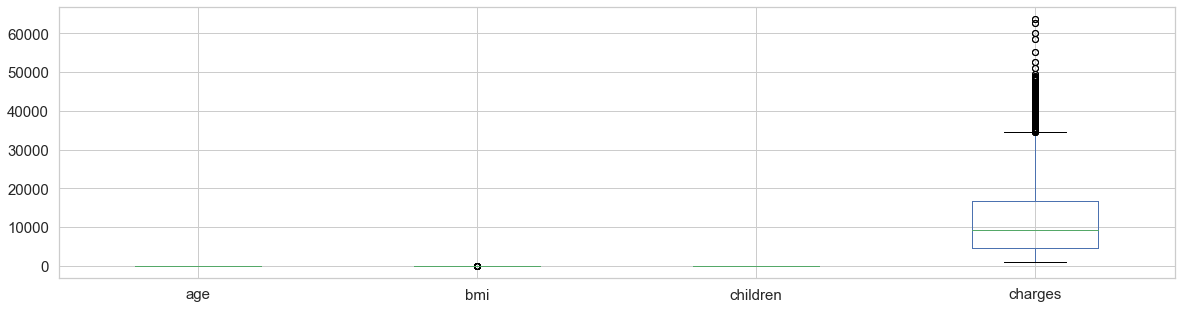

In [423]:
plt.figure(figsize=(20,5))
boxplot = df.boxplot(grid=True,  fontsize=15)
df.boxplot(column=['age','bmi','children','charges',])

The dots represent outliers. It seems like there are outliers for 'bmi' and 'charges'. Usually, you would delete the outliers from the dataset, but for our research, we are trying to figure out which feature has the most impact on the charges. So, it would be unnecessary to delete the outliers. 

### 4. Visualization and Correlation

#### 4.1 Histogram for charges (insurance cost)
Since our "target" is the charges (insurance cost), we will see how it is distributed. 
The graph below shows the overall view of the charges. It seems like more people pay less, and not too many people pay a lot for their insurance cost. 

Text(0.5, 1.0, 'Distribution of Charges')

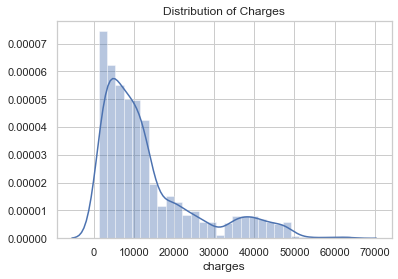

In [424]:
sns.distplot(df_final.charges) 
plt.title('Distribution of Charges')

#### 4.2 The seaborn pairplot 
Below is showing us a graphical summary of the relationships of the features within the dataset. 

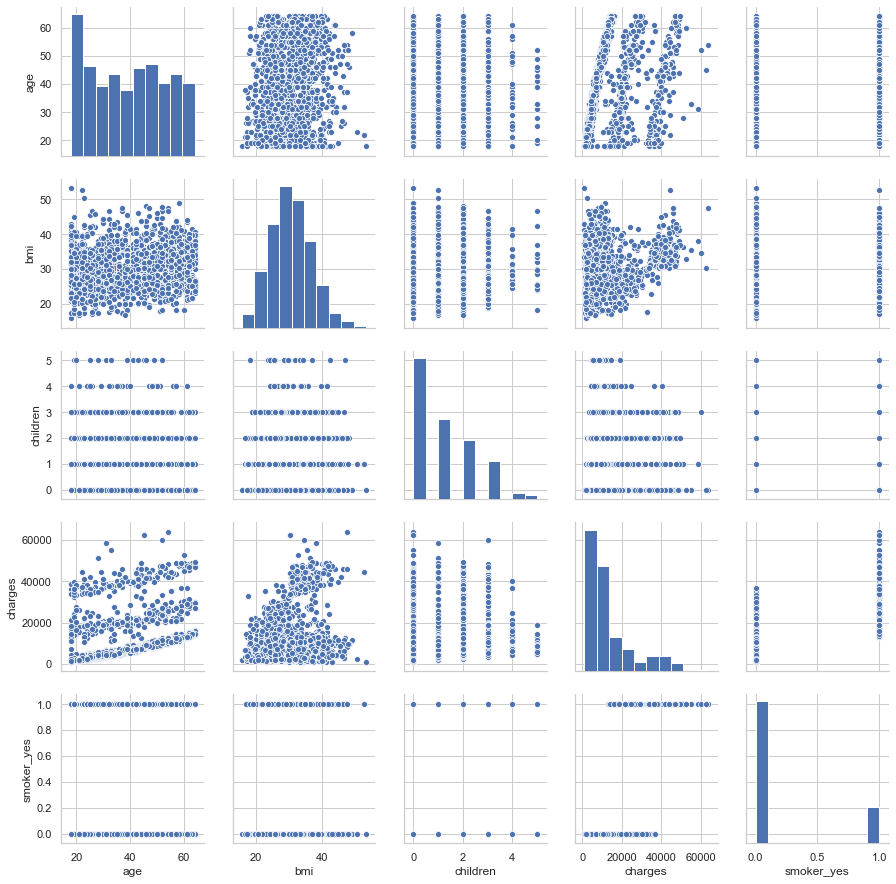

In [425]:
sns.pairplot(df_final)

#### 4.3 Seaborn Corrleation Heatmap
Below is a correlation heatmap between each features. When the number is closer to 1, it means that the correlation is high. It the number is closer to 0, it means that there is less correlation. The correlation betwwen self shows at 1.0 so we do not have to pay attention to self. Our results show that charges and smoker has the highest correlation, charges and age is the second highest, and charges and bmi is the third highst. The rest do not really have correlation to each other. 

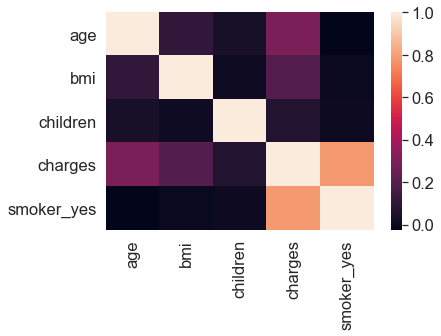

In [444]:
sns.heatmap(df_final.corr())

#### 4.4 Scatterplot with the three highest correlation features

Since we found the three highest correlation, we will compare them to charges.
Our first graph shows that people who smoke has a higher charge(insurance cost) compared to those who do not smoke. 

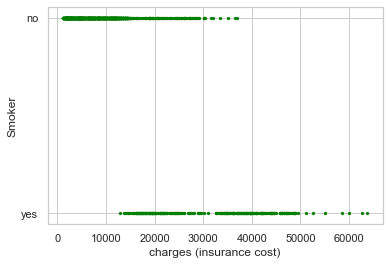

In [427]:
plt.xlabel('charges (insurance cost)')
plt.ylabel('Smoker')
plt.scatter(df.charges, df.smoker,20, color= 'green', marker = '.')

The two graphs below show the scatter plot for charges and age, and charges and BMI. Since age and bmi had the second and third highest correlation, we would assume that it would show a clear correlation of having higer age-higher charge, and higher bmi-higher charge. However, with the scatter plot, yes sometimes older people have higher cost and people with higher bmi also have higher cost, but that isn't always the case. It seems like even young people can have high cost and people with high bmi can have low cost as well. The two scatter plots are showing some correlation, but not very distictive as it was with smokers. 

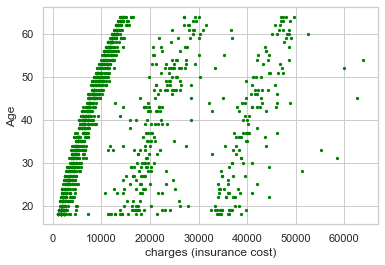

In [428]:
plt.xlabel('charges (insurance cost)')
plt.ylabel('Age')
plt.scatter(df.charges, df.age,20, color= 'green', marker = '.')

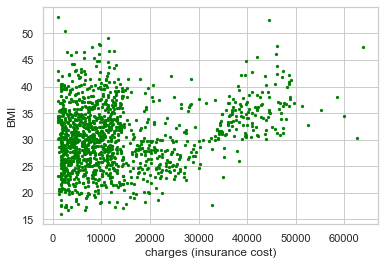

In [429]:
plt.xlabel('charges (insurance cost)')
plt.ylabel('BMI')
plt.scatter(df.charges, df.bmi,20, color= 'green', marker = '.')

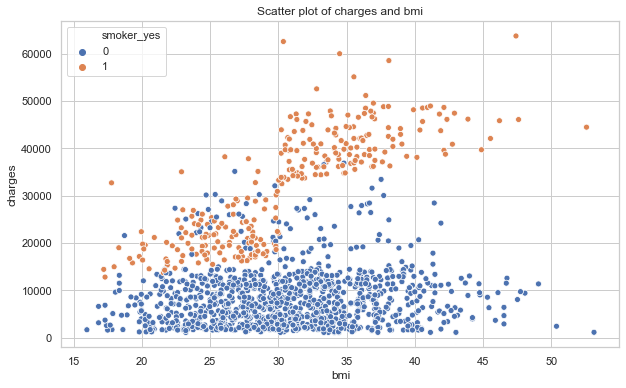

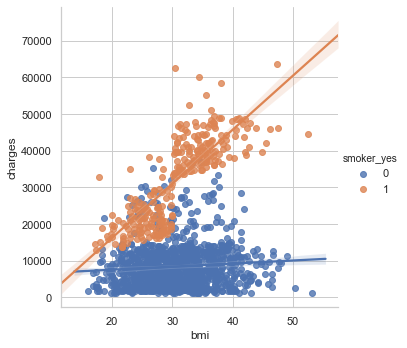

In [430]:
plt.figure(figsize=(10,6))
pt = sns.scatterplot(x='bmi',y='charges',data=df_final,hue='smoker_yes')
pt.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker_yes", data=df_final)

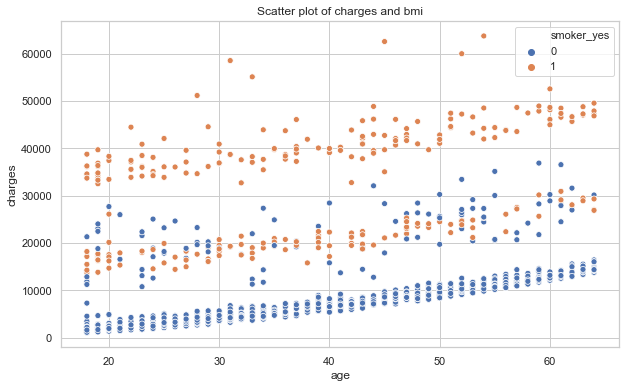

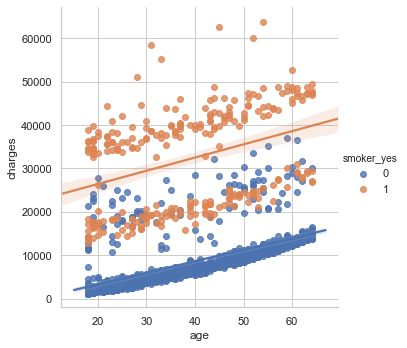

In [431]:
plt.figure(figsize=(10,6))
ptt = sns.scatterplot(x='age',y='charges',data=df_final,hue='smoker_yes')
ptt.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="age", y="charges", hue="smoker_yes", data=df_final)

### 5. Linear Regression Model

#### 5.1 Testing and Training Data
We will divide our data into testing and training data. This is so that our model can learn from the training set, and after it learns, it will test the learnings on the testing set. Below, we are printing our training dataset.

In [432]:
X = df_final.drop(['charges'], axis = 1)
Y = df_final.charges

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state= 0)
print(X_train,Y_train.shape)

      age     bmi  children  smoker_yes
621    37  34.100         4           1
194    18  34.430         0           0
240    23  36.670         2           1
1168   32  35.200         2           0
1192   58  32.395         1           0
1279   25  26.790         2           0
49     36  35.200         1           1
597    34  33.250         1           0
539    53  31.350         0           0
425    45  24.310         5           0
692    20  32.395         1           0
466    60  28.700         1           0
575    58  27.170         0           0
923    34  35.815         0           0
446    60  29.640         0           0
471    18  30.115         0           0
44     38  37.050         1           0
1092   23  32.700         3           0
969    39  34.320         5           0
1188   43  25.270         1           1
930    26  46.530         1           0
529    18  25.460         0           0
276    19  20.615         2           0
330    61  36.385         1           1


Below shows the number of columns and rows for our training data and testing data. 

In [433]:
print("Train Size", X_train.shape, "Test Size: ", X_test.shape, sep = "\n")

Train Size
(1070, 4)
Test Size: 
(268, 4)


By using sklearn's linear regression model, we were able to get the result of 0.7978. The result is most accurate when it is close to 1, so our results is not perfect, but gan be considered fairly good. 

In [434]:
lr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = lr.predict(X_train)
Y_test_pred = lr.predict(X_test)

print(lr.score(X_test,Y_test))

0.7978274606303823


The plots below shows the visualization of our result. 

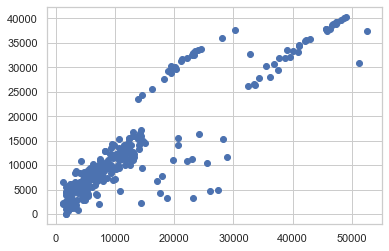

In [435]:
predictions = lr.predict(X_test)
plt.scatter(Y_test,predictions)

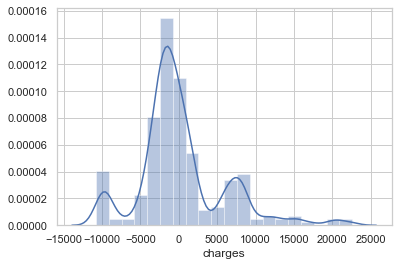

In [436]:
sns.distplot((Y_test-predictions),bins=20);

Below shows Ordinary Least Square (OLS) results using statsmodels.api. The R-squared is the variance explained in the data, and got 0.734 which is decent (73% variance of the target variable). You can also see details with differnt statistical factors. Below the reults, MAE (mean absolute error), MSE (mean squared error), and RMSE(root mean squared error) are also shown. 

In [437]:
X = X_train[['bmi', 'age', 'smoker_yes']]
y = Y_train
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     981.8
Date:                Tue, 22 Sep 2020   Prob (F-statistic):          3.90e-306
Time:                        02:11:26   Log-Likelihood:                -10857.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1066   BIC:                         2.174e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.157e+04   1055.832    -10.960      0.0

C:\Users\Sooyeon Choi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [442]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 3941.0693977631017
MSE: 32171708.57245572
RMSE: 5672.010981341249


Out residual shape seems like somewhat of a U shape, but not very clear. 

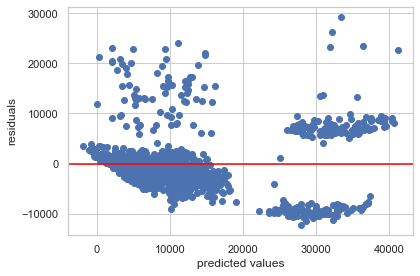

In [439]:
residuals = res.resid
Y_pred = res.predict(X)
plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.tight_layout()

### Conclusion
In conclusion, we can say that smoking is the most influcential factor for medical insurance charge, followed by age, and then BMI. The Linear Regression Model was able to find a decent accuracy for our insrance cost prediction. However, using other algorithms such as Random Forest Regrssion may help find better accuracy in future studies. 